# Predicting Used-Car Prices

Hello, My name is Rafael. In this notebook i'll cover a model to predicting car prices base on some specifications. This model will then be evaluated on how well it predicts the actual prices.

## About Dataset and Features
The dataset provided contains a list of real used-car sales records in the US. The following are descriptions of each column in the dataset.

- Brand - The make of the car (Toyota, Mercedes-Benz, Audi, ...)
- Price - The price in USD at which the car was sold
- Body - The car's body style (Sedan, Hatchback, Crossover, ...)
- EngineV - The engine volume / displacement in Liters
- Mileage - The car's mileage in thousands. A "0" mileage means the car was driven for less than a thousand miles
- EngineType - The type of the engine based on the fuel used. (Diesel, Petrol, Gas, ...)
- Registration - A yes/no value indicating whether the car had a valid registration at the time of the sale
- Year - The vehicles model year
- Model - The name of the car's model (RAV4, Camry, Jetta, ...)

## **Structure of My Project Based On CRISP-DM**


1. Business Understanding

2. Data Understanding
    * EDA
3. Data Preparation
    * Data Cleaning
    * Feature Engineering
    * Future Scaling
4. Data Modeling
    * Future Importance
    * Future Selection
    * Selecting Model Technique
    * Build Model 
    * Hyperparameter using GridSearchCV
    * Find Best Model
5. Evaluation
6. Deployment

## **1. Business Understanding**

Selling a used car 

## **2. Data Understanding**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set()

### Load Dataset

In [7]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


In [8]:
# check skewwnes of numerical data
# if skeww < 0.8 we do need to transform data
raw_data.skew()

/var/folders/0j/z82zps1s0y58pp3cvvqgxqtc0000gn/T/ipykernel_752/1429778688.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  raw_data.skew()


Price      4.45
Mileage    0.81
EngineV   16.89
Year      -0.95
dtype: float64

In [9]:
raw_data.columns = raw_data.columns.str.replace(' ','_')
raw_data.columns = raw_data.columns.str.lower()

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4345 non-null   object 
 1   price         4173 non-null   float64
 2   body          4345 non-null   object 
 3   mileage       4345 non-null   int64  
 4   enginev       4195 non-null   float64
 5   engine_type   4345 non-null   object 
 6   registration  4345 non-null   object 
 7   year          4345 non-null   int64  
 8   model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


* There are no detectable incorrect dtypes
* There are 4345 row and 9 columns
* There are 4 numerical variable and 5 categorical variable

In [11]:
raw_data.describe()

,price,mileage,enginev,year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


Explanation:
* in row ```count``` we see a different values, so there is a missing values
* in ```engineV``` column there is error values, maximum engine volume is 6.5 but there is a 99 L
* in ```price``` column there a big gap between maximum value and mean and median. 
* in ```Milage``` column same as price there is a big gap too.

There a lot of outlier and error values that we found.

#### unique values

In [12]:
unique_values={'column':[],
               'unique':[],
               'length':[]}
for col in raw_data.columns:
    unique = raw_data[col].unique()
    lngth = len(unique)
    
    unique_values['column'].append(col)
    unique_values['unique'].append(unique)
    unique_values['length'].append(lngth)
pd.DataFrame(unique_values)

,column,unique,length
0,brand,"[BMW, Mercedes-Benz, Audi, Toyota, Renault, Vo...",7
1,price,"[4200.0, 7900.0, 13300.0, 23000.0, 18300.0, 19...",907
2,body,"[sedan, van, crossover, vagon, other, hatch]",6
3,mileage,"[277, 427, 358, 240, 120, 0, 438, 200, 193, 21...",410
4,enginev,"[2.0, 2.9, 5.0, 4.2, 5.5, 2.7, 1.5, 1.8, 1.79,...",74
5,engine_type,"[Petrol, Diesel, Gas, Other]",4
6,registration,"[yes, no]",2
7,year,"[1991, 1999, 2003, 2007, 2011, 2016, 1997, 200...",39
8,model,"[320, Sprinter 212, S 500, Q7, Rav 4, GLS 63, ...",312


I highlight 3 columns that i interest with it:

* There are 7 brand in this data
* In this dataset record a cars sales for 39 years 
* And then engine volume have 74 unique values

In [13]:
np.sort(raw_data['enginev'].unique())[:-20:-1]

array([  nan, 99.99, 90.  , 75.  , 74.  , 66.  , 55.  , 30.  , 28.  ,
       22.  , 20.  , 19.  , 15.  ,  9.  ,  7.2 ,  6.5 ,  6.3 ,  6.2 ,
        6.  ])

In [14]:
raw_data[raw_data['enginev']==9]

,brand,price,body,mileage,enginev,engine_type,registration,year,model
3289,Volkswagen,10000.00,sedan,90,9.00,Petrol,no,2010,Passat B6


i'll search on google that passat B6 have 2.0 liters engine volume, that means above 9 liters in data must be error data.

In [15]:
raw_data.iloc[3289,4] = 2.0

### **Exploring Data Analysis**

#### Split Data into Numerical Variable and Categorical Variable

In [16]:
num_var = raw_data.select_dtypes(include='number', exclude='category')
categorical_var = raw_data.select_dtypes(include='object', exclude='number')

#### Dealing with Categorical Variable

In [17]:
categorical_var

,brand,body,engine_type,registration,model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4
...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350
4341,BMW,sedan,Petrol,yes,535
4342,BMW,sedan,Petrol,yes,520
4343,Toyota,sedan,Petrol,yes,Corolla


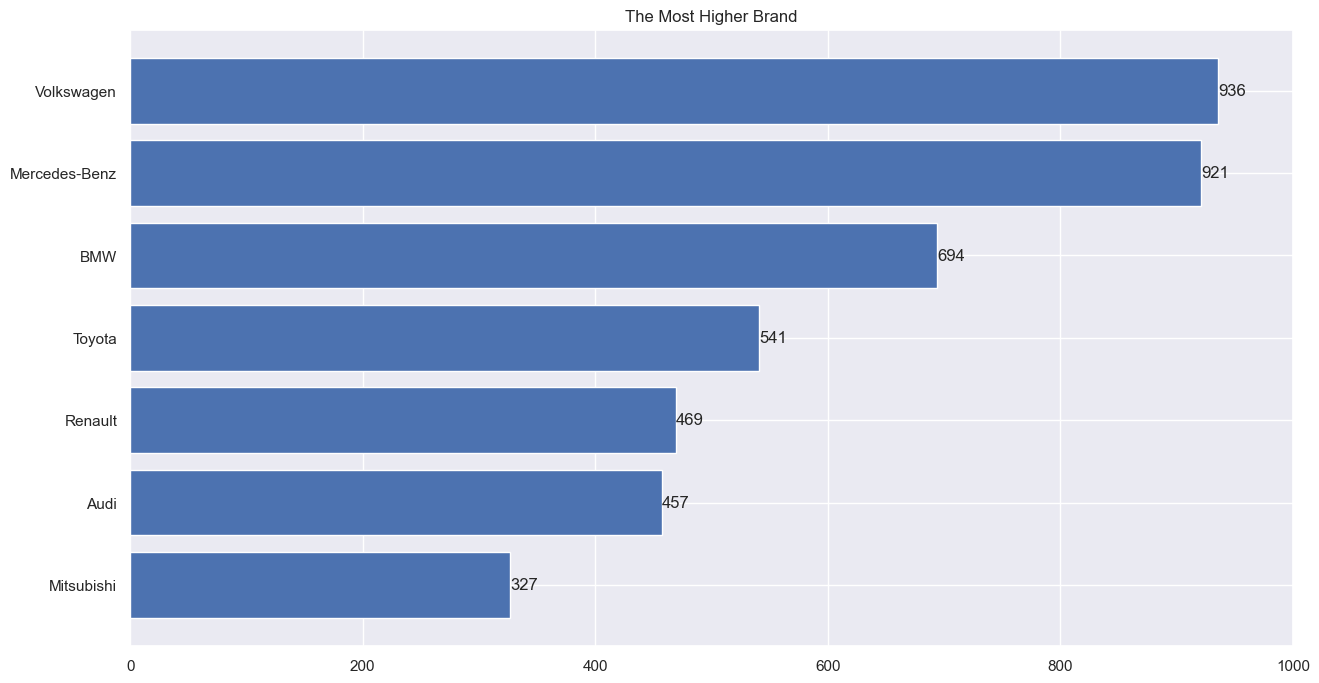

In [18]:
fig, ax = plt.subplots()

fig.set_size_inches(15,8)
plot = ax.barh(categorical_var['brand'].value_counts().sort_values(ascending=True).index,
            categorical_var['brand'].value_counts().sort_values(ascending=True).values,
            align='center')
ax.set_title('The Most Higher Brand')
ax.bar_label(plot)
ax.set_xlim(right=1000)

plt.show()

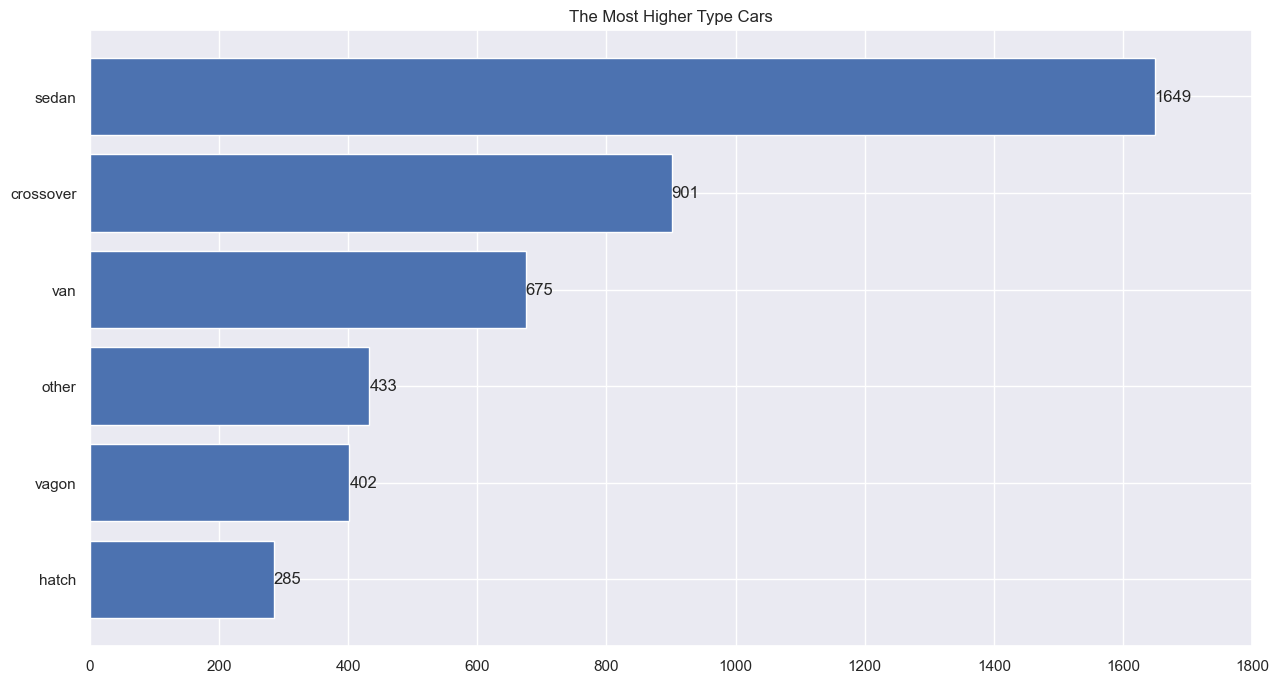

In [19]:
fig, ax = plt.subplots()

fig.set_size_inches(15,8)
plot = ax.barh(categorical_var['body'].value_counts().sort_values(ascending=True).index,
            categorical_var['body'].value_counts().sort_values(ascending=True).values,
            align='center')
ax.set_title('The Most Higher Type Cars')
ax.bar_label(plot)
ax.set_xlim(right=1800)

plt.show()

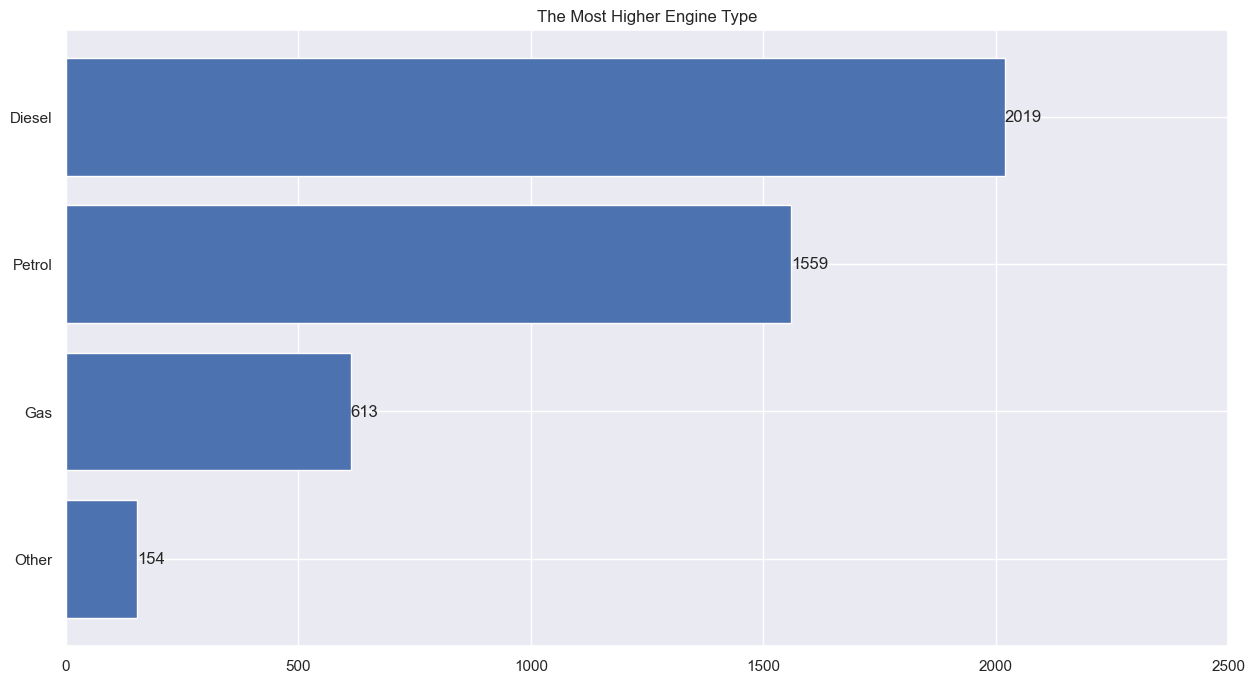

In [20]:
fig, ax = plt.subplots()

fig.set_size_inches(15,8)
plot = ax.barh(categorical_var['engine_type'].value_counts().sort_values(ascending=True).index,
            categorical_var['engine_type'].value_counts().sort_values(ascending=True).values,
            align='center')
ax.set_title('The Most Higher Engine Type')
ax.bar_label(plot)
ax.set_xlim(right=2500)

plt.show()

In [21]:
categorical_var

,brand,body,engine_type,registration,model
0,BMW,sedan,Petrol,yes,320
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212
2,Mercedes-Benz,sedan,Gas,yes,S 500
3,Audi,crossover,Petrol,yes,Q7
4,Toyota,crossover,Petrol,yes,Rav 4
...,...,...,...,...,...
4340,Mercedes-Benz,sedan,Diesel,yes,S 350
4341,BMW,sedan,Petrol,yes,535
4342,BMW,sedan,Petrol,yes,520
4343,Toyota,sedan,Petrol,yes,Corolla


[Text(0.5, 0, 'Total Cars'), Text(0, 0.5, 'Brand')]

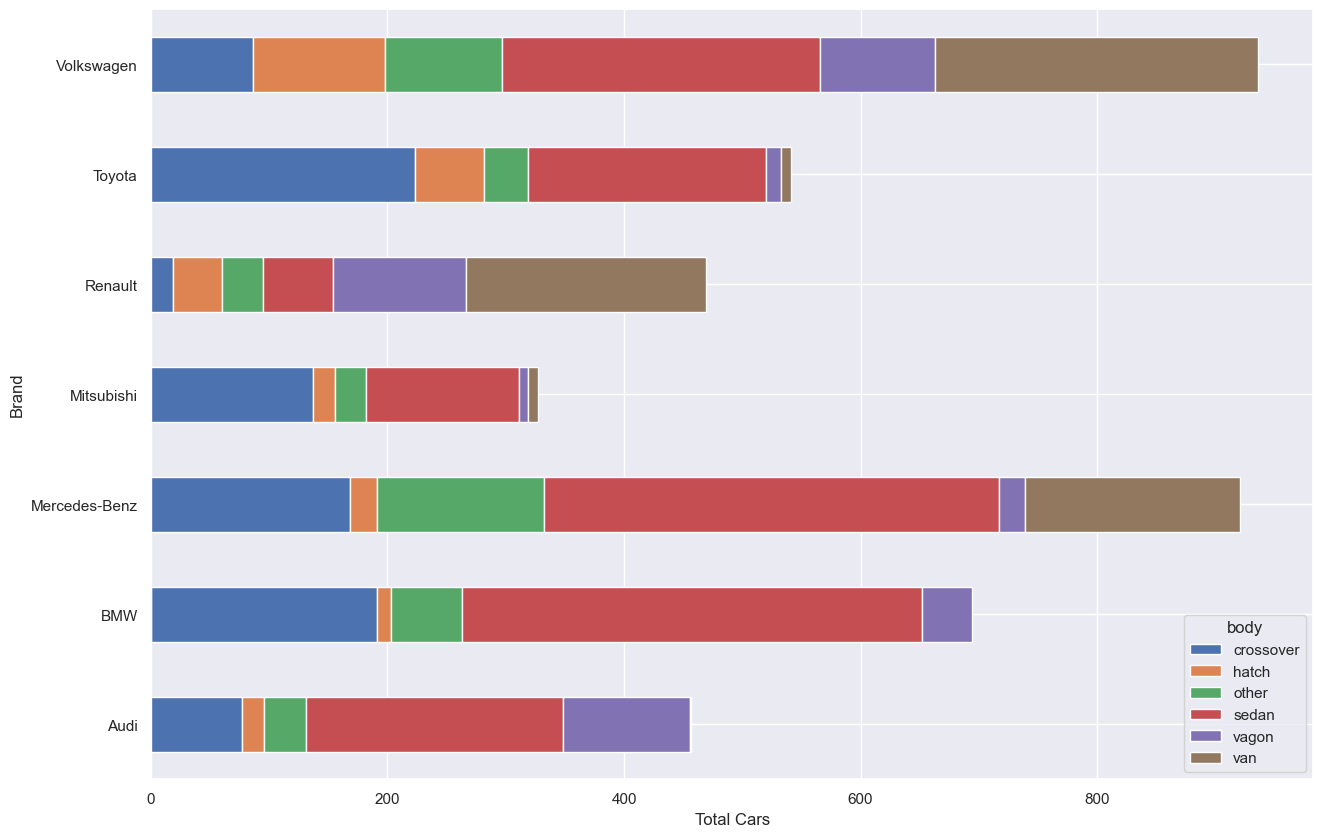

In [22]:
ax = raw_data.groupby(['brand','body'])['engine_type']\
    .count().unstack()\
        .plot(kind='barh', figsize=(15,10), stacked=True)

ax.set(xlabel='Total Cars', ylabel='Brand')

* Mercedes-Benz and BMW have produces the most sedans than others and mitsubishi a lower one.
* Mitsubishi produces the fewest vans

[Text(0.5, 0, 'Total Cars'), Text(0, 0.5, 'Brand')]

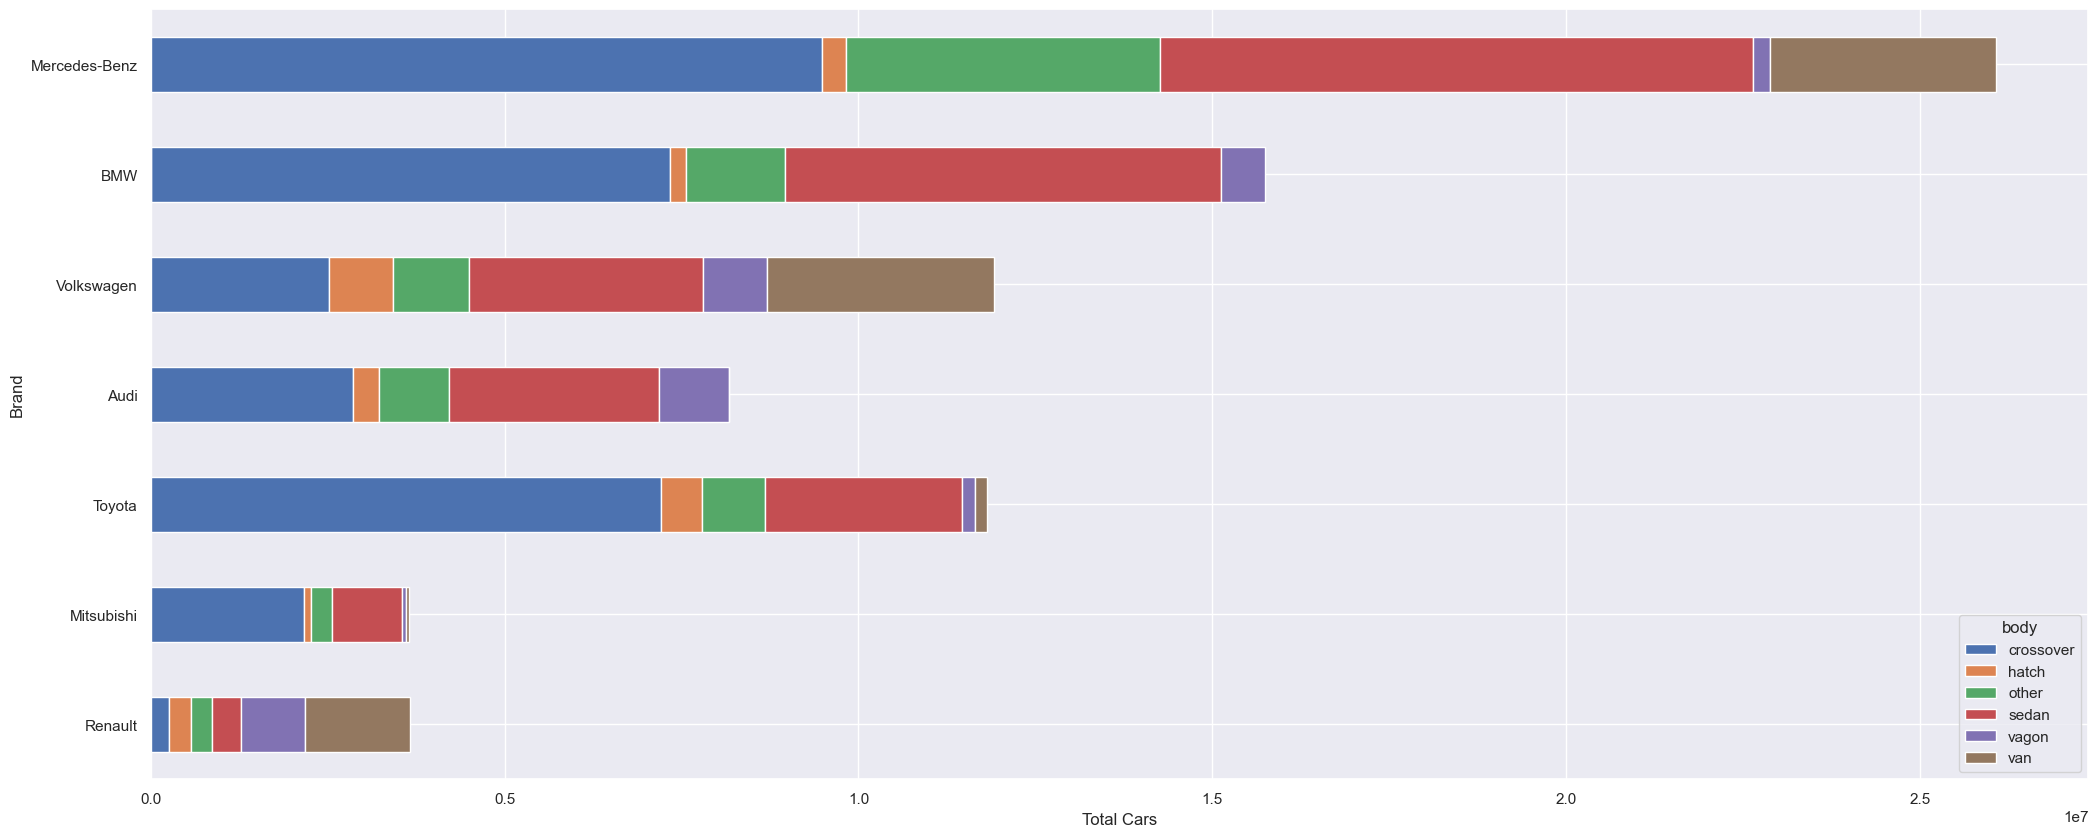

In [23]:
ax = raw_data.groupby(['brand','body'])['price']\
    .sum().unstack()\
        .sort_values(by='sedan')\
        .plot(kind='barh', figsize=(25,10), stacked=True)

ax.set(xlabel='Total Cars', ylabel='Brand')

* Mercedes has the highest sales by producing sedans and crossovers
* BMW profits are also obtained through sedans and crossovers
* Volkswagen makes a profit selling crossovers, sedans and vans

#### Numerical Variable

Let's visualized a numerical variabel into histogram.

In [24]:
def numeric_viz(data):
    #  plot Numerical Data
    a = len(data.columns)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(10,16))

    for col in data.columns:
        plt.subplot(a, b, c)
        plt.title(f'{col}')
        plt.xlabel(col)
        sns.histplot(data[col],color='darkblue', kde=True)
        plt.grid()
        c = c + 1

        plt.subplot(a, b, c)
        plt.title(f'{col}')
        plt.xlabel(col)
        sns.boxplot(x = data[col])
        plt.grid()
        c = c + 1

    plt.tight_layout()
    plt.show()

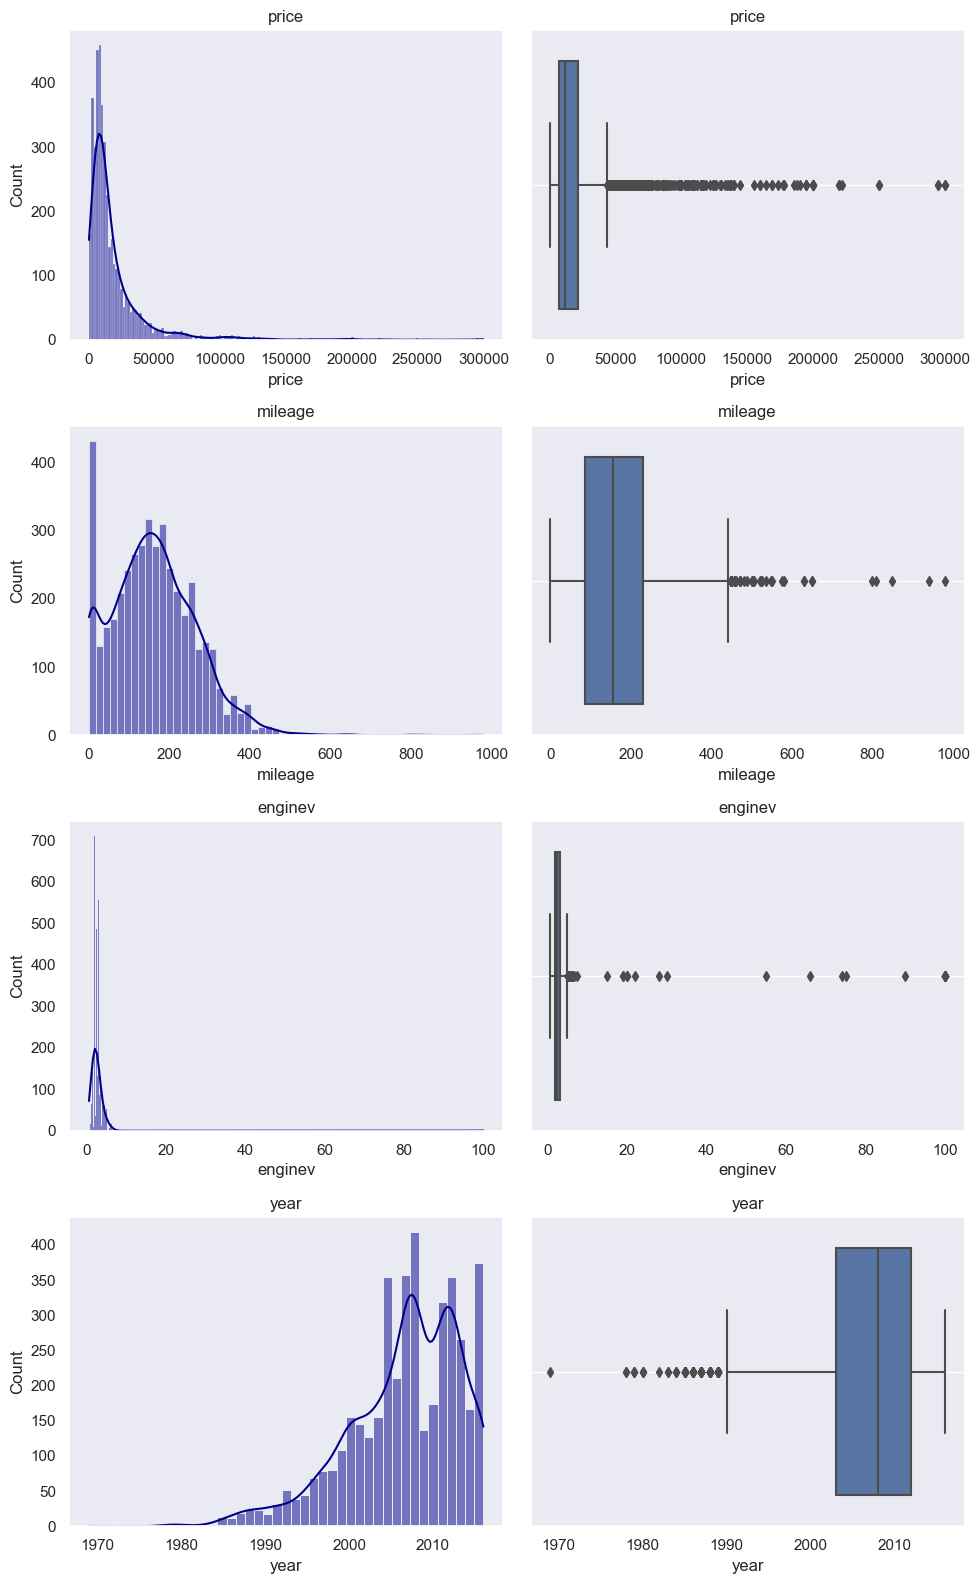

In [25]:
numeric_viz(num_var)

There are 3 positive skew indicates outlier more on the right data, and 1 negative skew indicates outlier more on the left data.

In [26]:
def num_relation_viz(data, y):
    # check the correlation against y
    corr = data.corr()
    print(f'Correlation {y}(dependent) and Independent Variable :')
    print(corr[y])
    
    # create a heatmap 
    print('\n')
    sns.heatmap(corr, annot=True, cmap='RdBu', annot_kws={"size":15, 'fontweight':'bold'}, square=True, vmin=-1, vmax=1) # for triagle look mask=np.triu(corr))
    sns.set(rc = {'figure.figsize':(8,8)})
    plt.title('Correlation',fontdict={'family':'fantasy','color':'darkblue','size':30})
    plt.tight_layout()
    plt.xlabel('Corr')
    plt.show()
    
    # create a scatterplot to see how 
    sns.pairplot(data)
    plt.show()
    
    x_col = data.columns
    x_col = x_col.drop(y)
    
    fig = plt.figure(figsize=(18,8))
    for pos, x_col in enumerate(x_col):
        plt.subplot(1, 3, pos+1)
        sns.regplot(x = x_col, y=y,data=data)
        plt.xlabel(x_col)
        plt.ylabel(y)
        plt.title(f"{x_col} vs {y}")
    plt.tight_layout()
    plt.show()

Correlation price(dependent) and Independent Variable :
price      1.00
mileage   -0.46
enginev    0.06
year       0.49
Name: price, dtype: float64




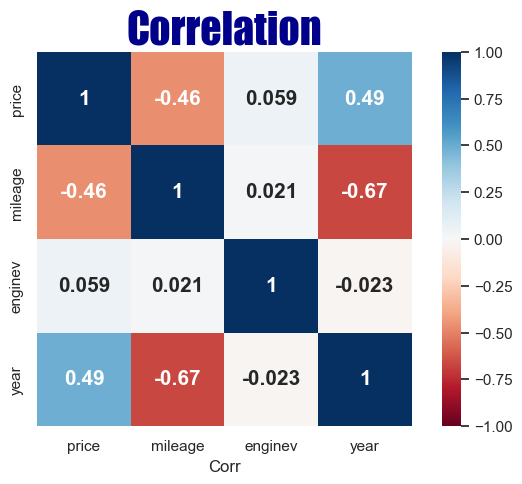

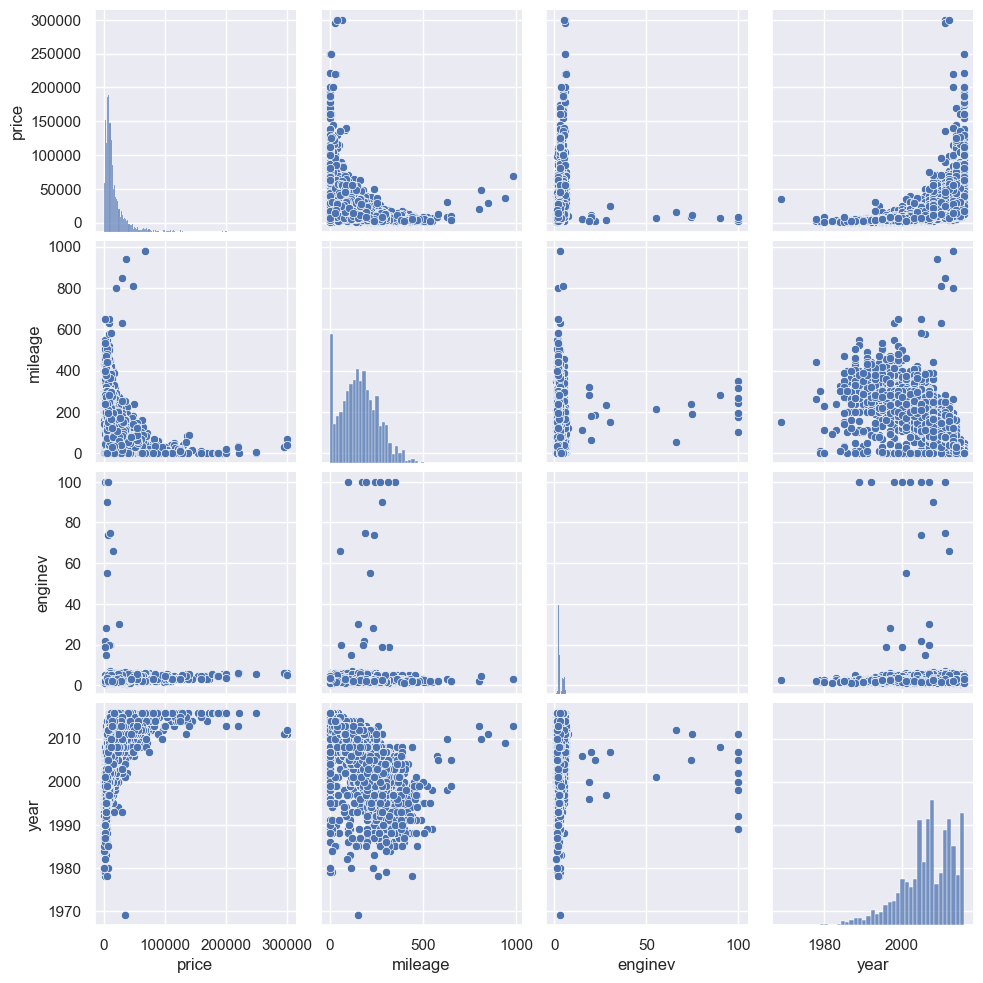

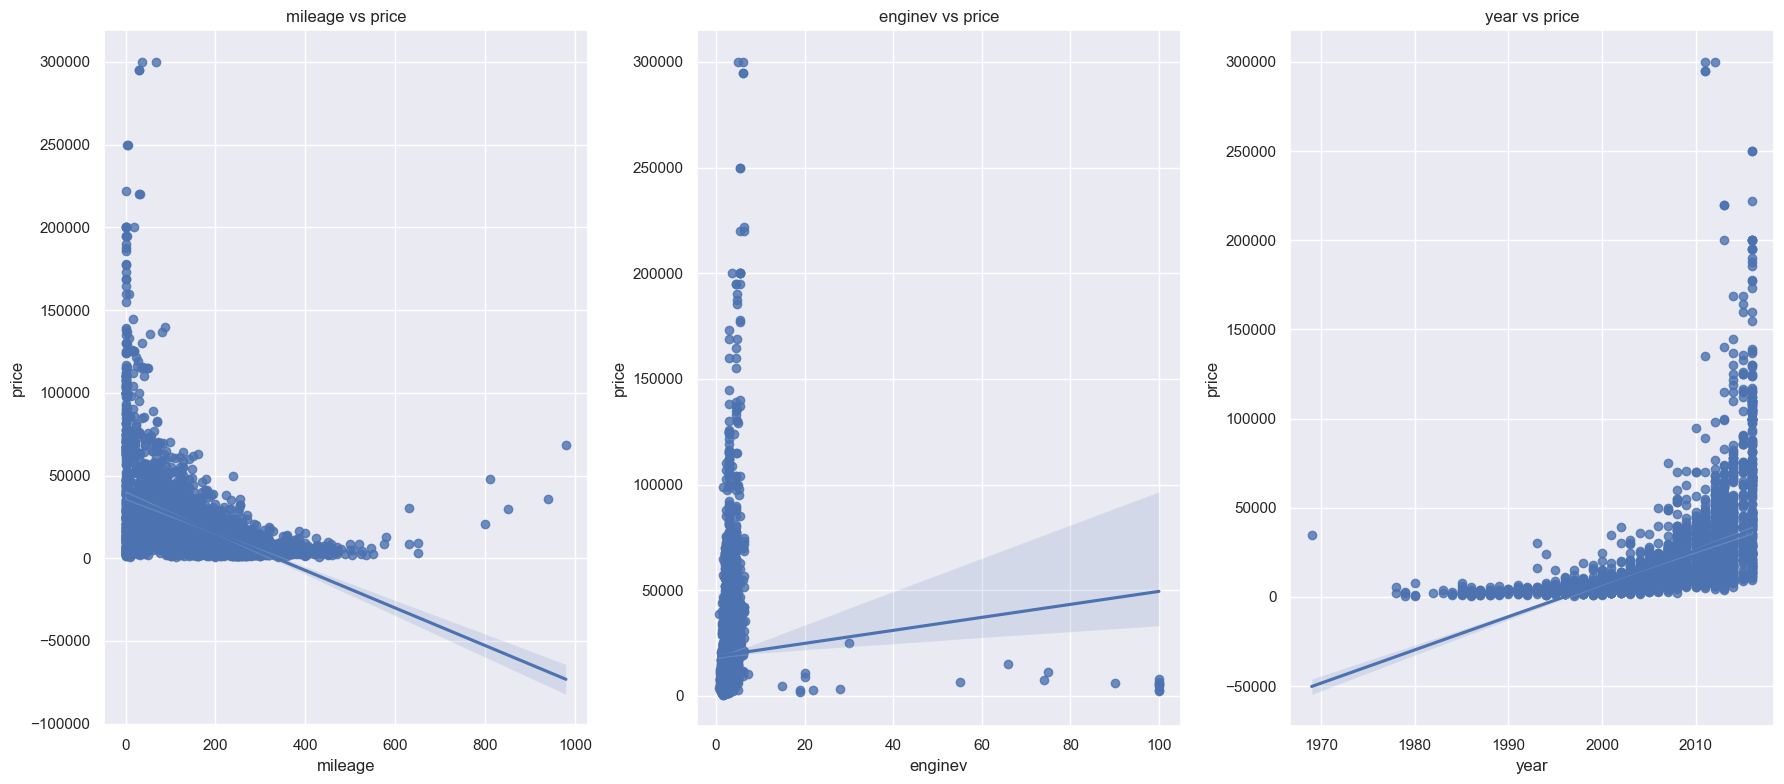

In [27]:
num_relation_viz(num_var,'price')

Outlier and Error data effect our analysis. Let's fix it in data Preparation

## **3. Data Preparation**

### Cleaning Data

#### Fix Missing Values

In [28]:
missing_values = raw_data.isnull().sum().to_frame().reset_index()
missing_values = missing_values.rename(columns={'index':'column',
                                                0:'missing'})
missing_values['persentages'] = missing_values['missing']/len(raw_data) *100
missing_values

,column,missing,persentages
0,brand,0,0.00
1,price,172,3.96
2,body,0,0.00
3,mileage,0,0.00
4,enginev,150,3.45
5,engine_type,0,0.00
6,registration,0,0.00
7,year,0,0.00
8,model,0,0.00


now, we can see that the higher missing values below 5%, we can drop the missing values

In [29]:
clean_missing_values = raw_data.dropna(inplace=False)
clean_missing_values

,brand,price,body,mileage,enginev,engine_type,registration,year,model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520


#### Fix **Engine Volume** data 

Car engine volumes are usually below 6.5 liters

In [30]:
data_1 = clean_missing_values[clean_missing_values['enginev'] < 6.5]

In [31]:
#check shape of data
data_1.shape

(4003, 9)

#### Fix outliers


**outlier detection**
There are many outlier detection method.
1. Inter-Quartile Range (IQR)

    ```IQR = Q3-Q1```

2. Standard Deviation
3. Z-Score
    
    ```Z-Score = (xi – μ) / σ```

    where:

    * xi: A single data value
    * μ: The mean of the dataset
    * σ: The standard deviation of the dataset
    
    Z-scores are often used to detect outliers in a dataset. For example, observations with a z-score less than -3 or greater than 3 are often deemed to be outliers.
    

4. Modified Z-Score

    ```Modified z-score = 0.6745(xi – x̃) / MAD```

    where:

    * xi : A single data value
    * x̃  : The median of the dataset
    * MAD: The median absolute deviation of the dataset

    A modified z-score is more robust because it uses the median to calculate z-scores as opposed to the mean, which is known to be influenced by outliers. Iglewicz and Hoaglin recommend that values with modified z-scores less than -3.5 or greater than 3.5 be labeled as potential outliers.


**Let's Fix it**

In [32]:
def detect_outliers(data,num_var):
    """
    Parameter:
        data = dataframe data,
        num_var = numerical variabel
    
    Returns : New Dataframe
    
    """
    
    threshold = 3
    
    data_clean = data.copy() #create dataframe copy
    
    for var in num_var:
        z_score_values = [] 
        for value in data_clean[var]:
            #count a z_score
            z_score = (value - np.mean(data_clean[var])) / np.std(data_clean[var])
            z_score_values.append(np.abs(z_score))
        
        #adding to new column in a dataframe    
        data_clean[f'{var}_z_score'] = z_score_values
        
        #sort data under 3 z_score     
        data_clean = data_clean[data_clean[f'{var}_z_score']<threshold]
        data_clean.drop(columns=f'{var}_z_score', inplace=True)
        
    return data_clean

In [33]:
data_clean = detect_outliers(data_1,num_var)


In [34]:
data_clean

,brand,price,body,mileage,enginev,engine_type,registration,year,model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,Megane
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535


We've done fix outliers using z-score. Let's visualize it. 

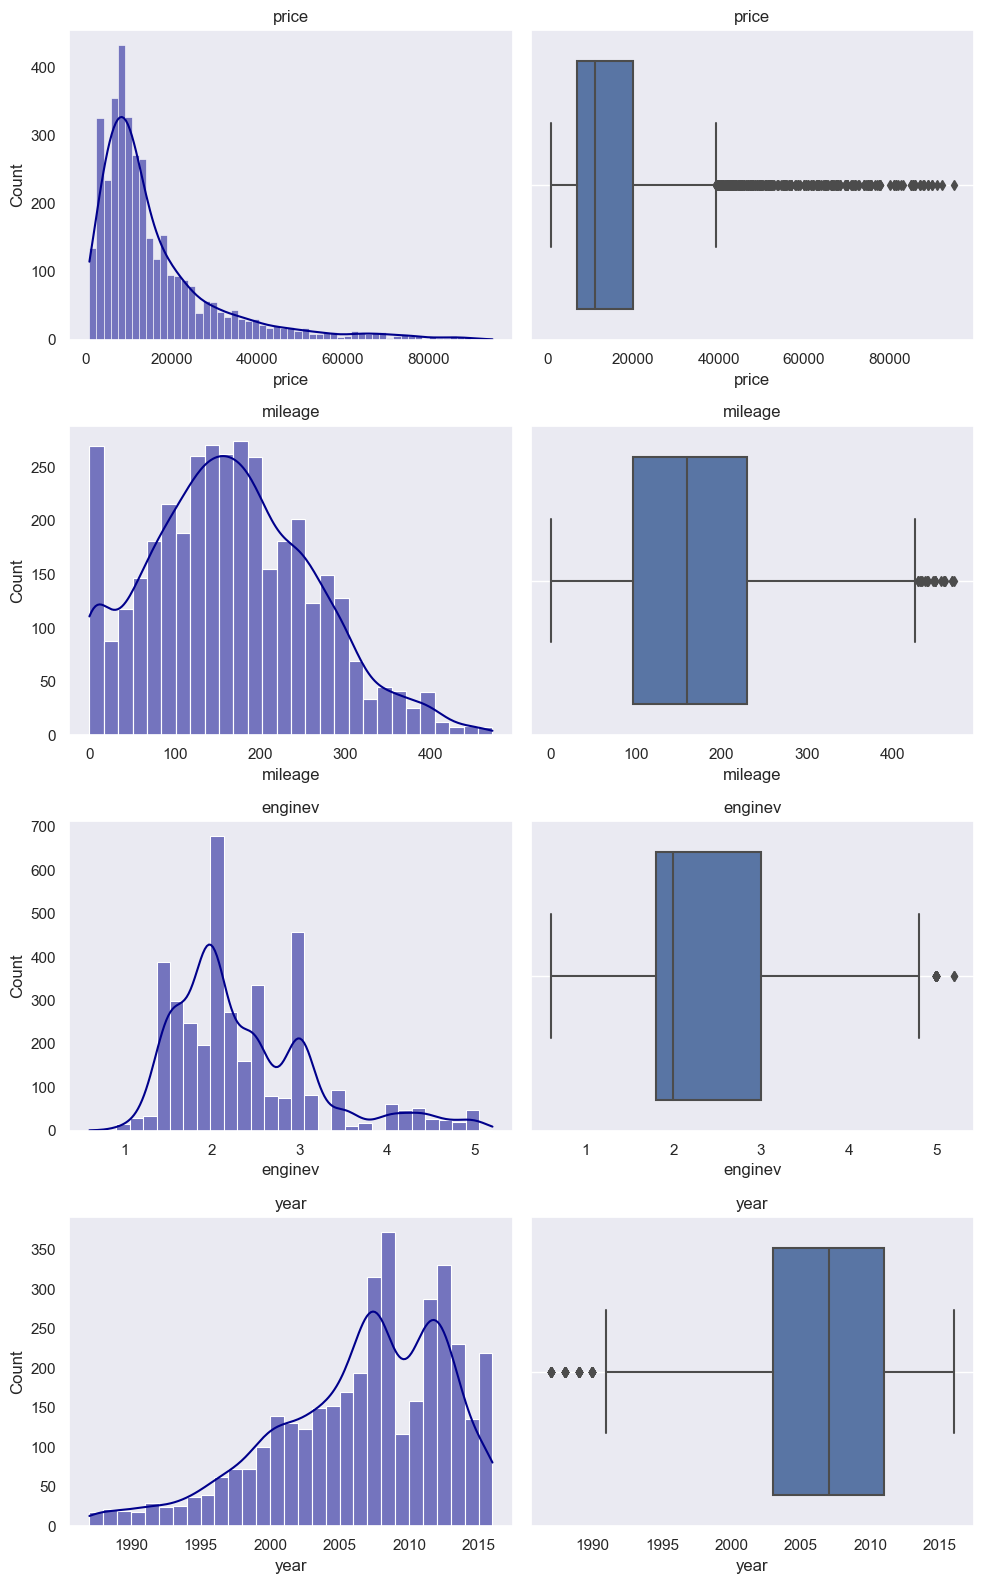

In [35]:
numeric_viz(data_clean.select_dtypes(include='number'))

Still have outliers but better than before. Before we transform it, we should get insight of the data

In [36]:
data_clean

,brand,price,body,mileage,enginev,engine_type,registration,year,model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,Megane
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter)
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535


In [37]:
data_clean.skew()

/var/folders/0j/z82zps1s0y58pp3cvvqgxqtc0000gn/T/ipykernel_752/3311173198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_clean.skew()


price      2.15
mileage    0.33
enginev    1.20
year      -0.76
dtype: float64

in result above, we need to transform price and engine_v because > 0.8

In [38]:
num_var.columns[1:]

Index(['mileage', 'enginev', 'year'], dtype='object')

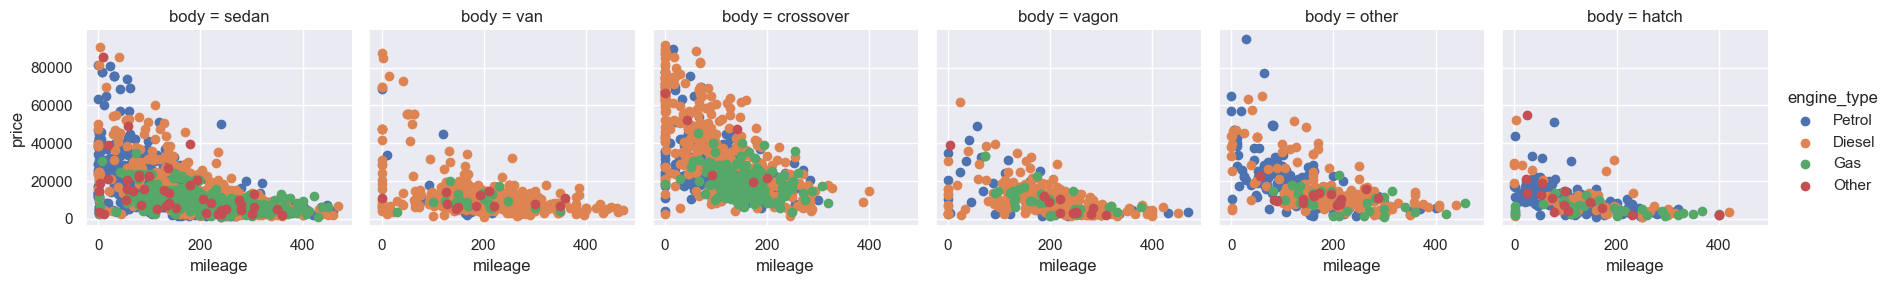

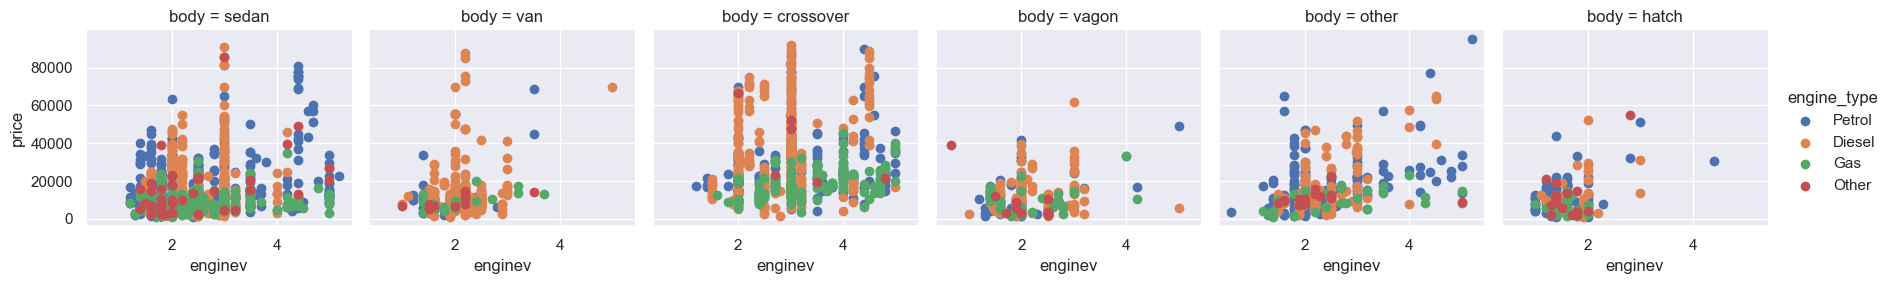

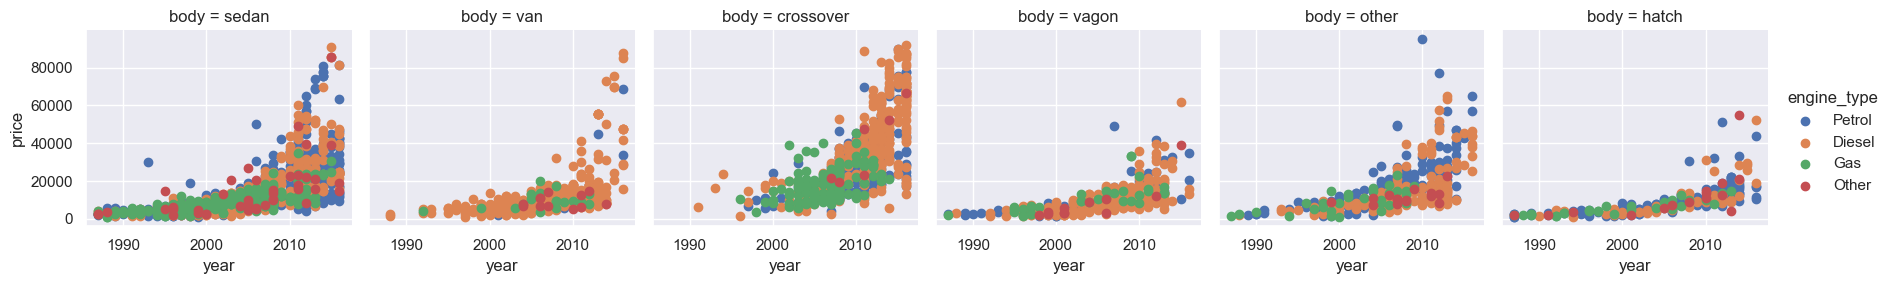

In [39]:
x_col = num_var.columns[1:]
y_columns = 'price'

for pos, x_col in enumerate(x_col):
    graph = sns.FacetGrid(data_clean, col='body', hue='engine_type')
    graph.map(plt.scatter, x_col, 'price').add_legend()
plt.show()

we obtain insight that:
* Price (Dependent Variable) and Mileage have a moderately negative correlation

        The lower the price of an automobile, the greater the mileage, although the information includes a column for the car's year. We can see that the mileage of the old automobile will be higher than that of the new one.

        Diesel crossover vehicles are considered new because the majority of them have zero mileage.

* Price (Dependent Variable) and enginev are low correlated
        
        
         

* Price and year are correlated and have a pattern (positive correlation)

        The newer the car is, the more expensive it is


### Future Engineering

The process of choosing, modifying, and converting raw data into features that may be utilized in supervised learning is known as feature engineering. To make machine learning operate successfully on new jobs, better features may need to be designed and trained. A "feature," as you may know, is any quantifiable input that may be utilized in a predictive model. [Reference](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10)

create new feature call age of the car

In [40]:
data_clean['age'] = data_clean['year'].nlargest(1).values - data_clean['year'] 

<AxesSubplot:xlabel='age', ylabel='Count'>

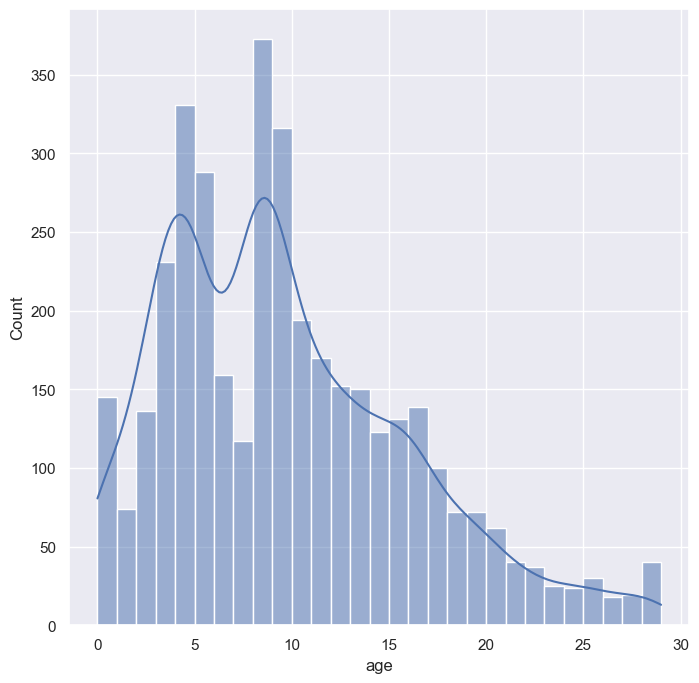

In [41]:
sns.histplot(x='age', data=data_clean, kde=True)

<AxesSubplot:xlabel='year', ylabel='Count'>

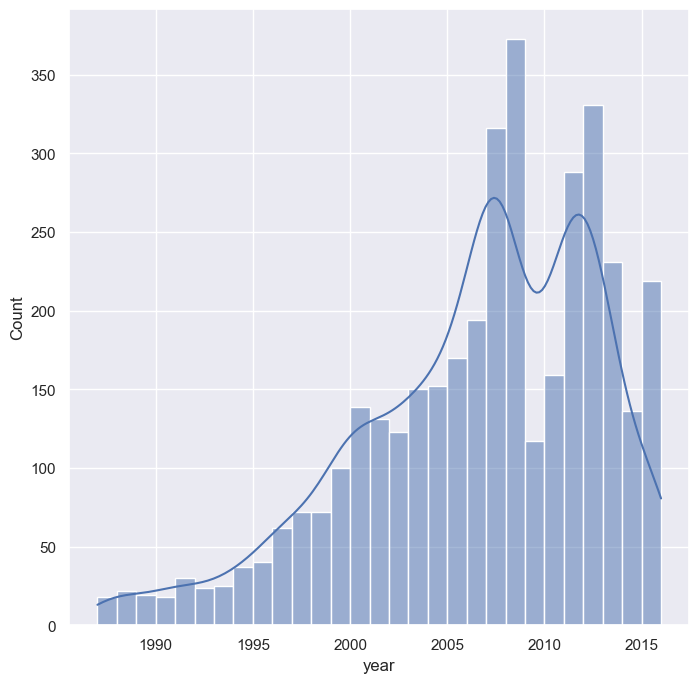

In [42]:
sns.histplot(x='year', data=data_clean, kde=True)

#### Transform data using log

In [43]:
transform_col = ['price', 'enginev']
# transform_col = ['age','price']

In [44]:
def transform(data, columns):
    data_transform = data.copy()
    for col in columns:
        data_transform[f'log_{col}'] = np.log(data[col] + 1)
        if col in data.columns:
            data_transform.drop(columns=col, axis=1,inplace=True)
        else:
            pass
    return data_transform

In [45]:
data_transform = transform(data_clean, transform_col)

In [46]:
data_clean

,brand,price,body,mileage,enginev,engine_type,registration,year,model,age
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,25
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,17
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,13
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,9
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,5
...,...,...,...,...,...,...,...,...,...,...
4337,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,Megane,9
4338,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter),8
4339,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla,2
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535,17


In [47]:
data_transform

,brand,body,mileage,engine_type,registration,year,model,age,log_price,log_enginev
0,BMW,sedan,277,Petrol,yes,1991,320,25,8.34,1.10
1,Mercedes-Benz,van,427,Diesel,yes,1999,Sprinter 212,17,8.97,1.36
2,Mercedes-Benz,sedan,358,Gas,yes,2003,S 500,13,9.50,1.79
3,Audi,crossover,240,Petrol,yes,2007,Q7,9,10.04,1.65
4,Toyota,crossover,120,Petrol,yes,2011,Rav 4,5,9.81,1.10
...,...,...,...,...,...,...,...,...,...,...
4337,Renault,sedan,152,Petrol,yes,2007,Megane,9,8.82,0.96
4338,Volkswagen,van,163,Diesel,yes,2008,T5 (Transporter),8,9.35,1.25
4339,Toyota,sedan,35,Petrol,yes,2014,Corolla,2,9.79,0.96
4341,BMW,sedan,1,Petrol,yes,1999,535,17,8.78,1.50


In [48]:
numerical_feats = data_transform.select_dtypes(include='number')
categorical_feats = categorical_var

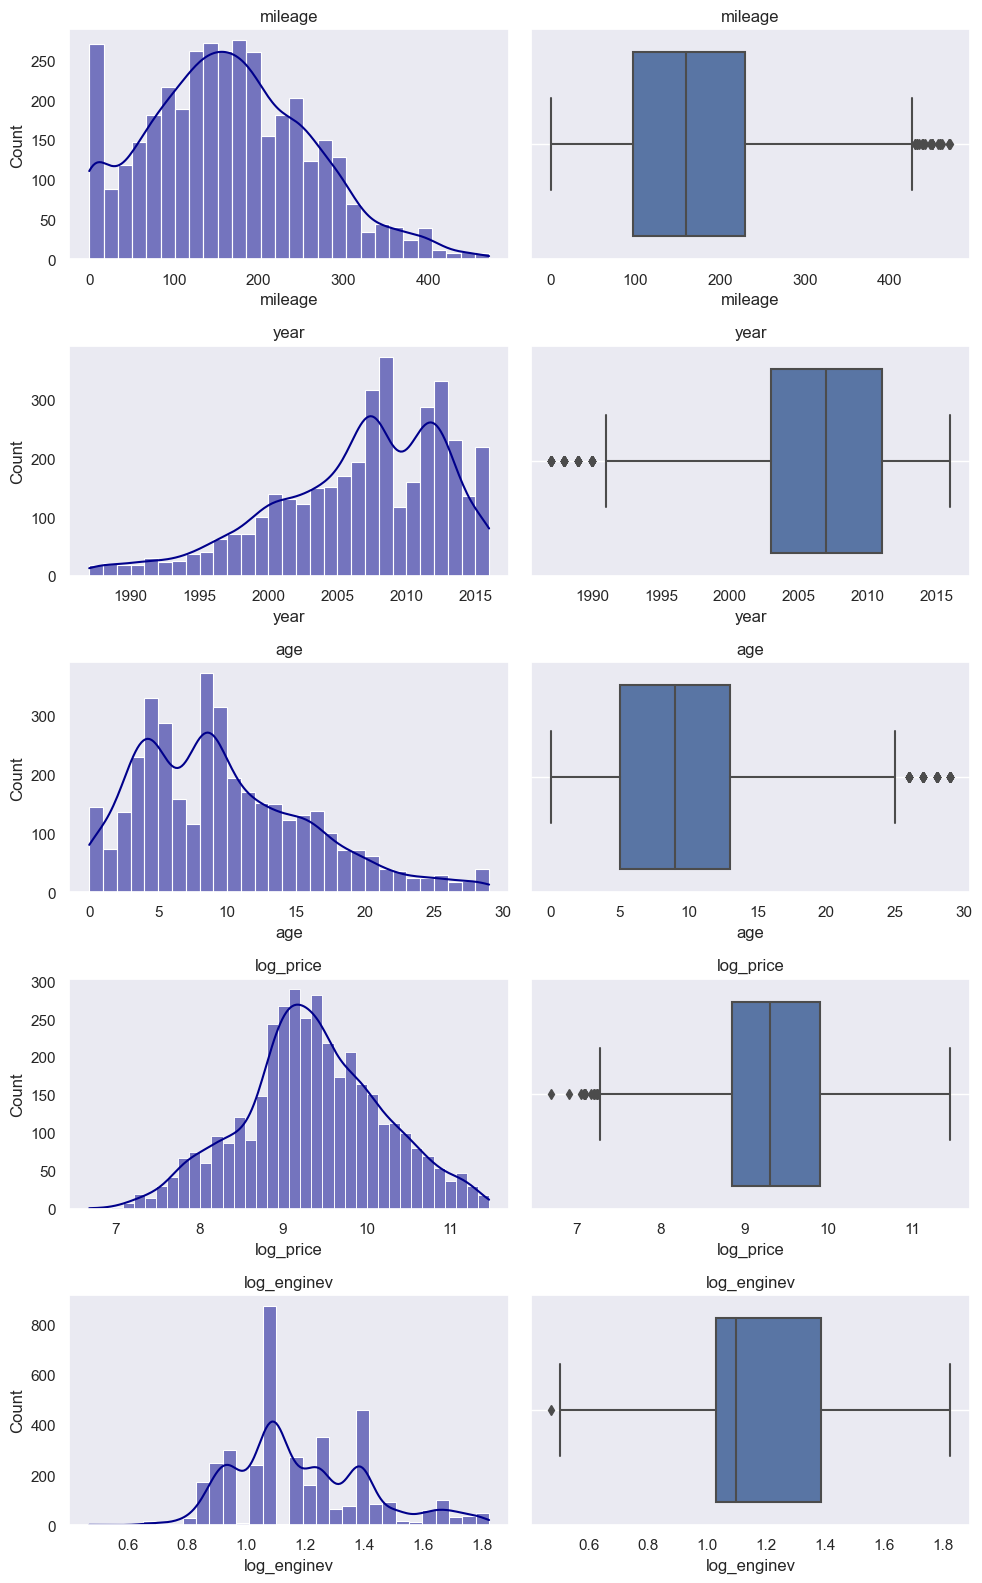

In [49]:
numeric_viz(numerical_feats)

#### Check Assumption of OLS

##### Multicollinearity

In [50]:
variables = data_transform.select_dtypes(include='number').drop(columns='log_price',axis=1)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [51]:
vif

,VIF,Features
0,1.99,mileage
1,30.16,year
2,6.64,age
3,1.01,log_enginev


In [52]:
variables = data_transform[['log_enginev','age','mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [53]:
vif

,VIF,Features
0,3.95,log_enginev
1,6.62,age
2,7.73,mileage



1. year have high corralated to each other, so we drop it,
2. model have much unique values, and it will ruin our machine 

In [54]:
# eliminating unnecessary variables
data_transform.drop(columns=['year','model'],axis=1, inplace=True) 

#### Covert categorical variable into numerical variable using OneHotEncoder and Future Scaling

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category. [Reference](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)

Feature scaling is a strategy for lowering the values of all of our dataset's independent characteristics on the same scale. Feature selection allows algorithms to do computations more rapidly. It is a crucial stage in data preparation. If we didn't use feature scaling, the machine learning model would give more weight to higher values and less weight to lower ones. In addition, training the machine learning model takes a long time. [Reference](https://medium.datadriveninvestor.com/feature-scaling-in-data-science-5b1e82492727)


In [55]:
numerical_feats = data_transform.select_dtypes(include='number')
categorical_feats = data_transform.select_dtypes(include='object')

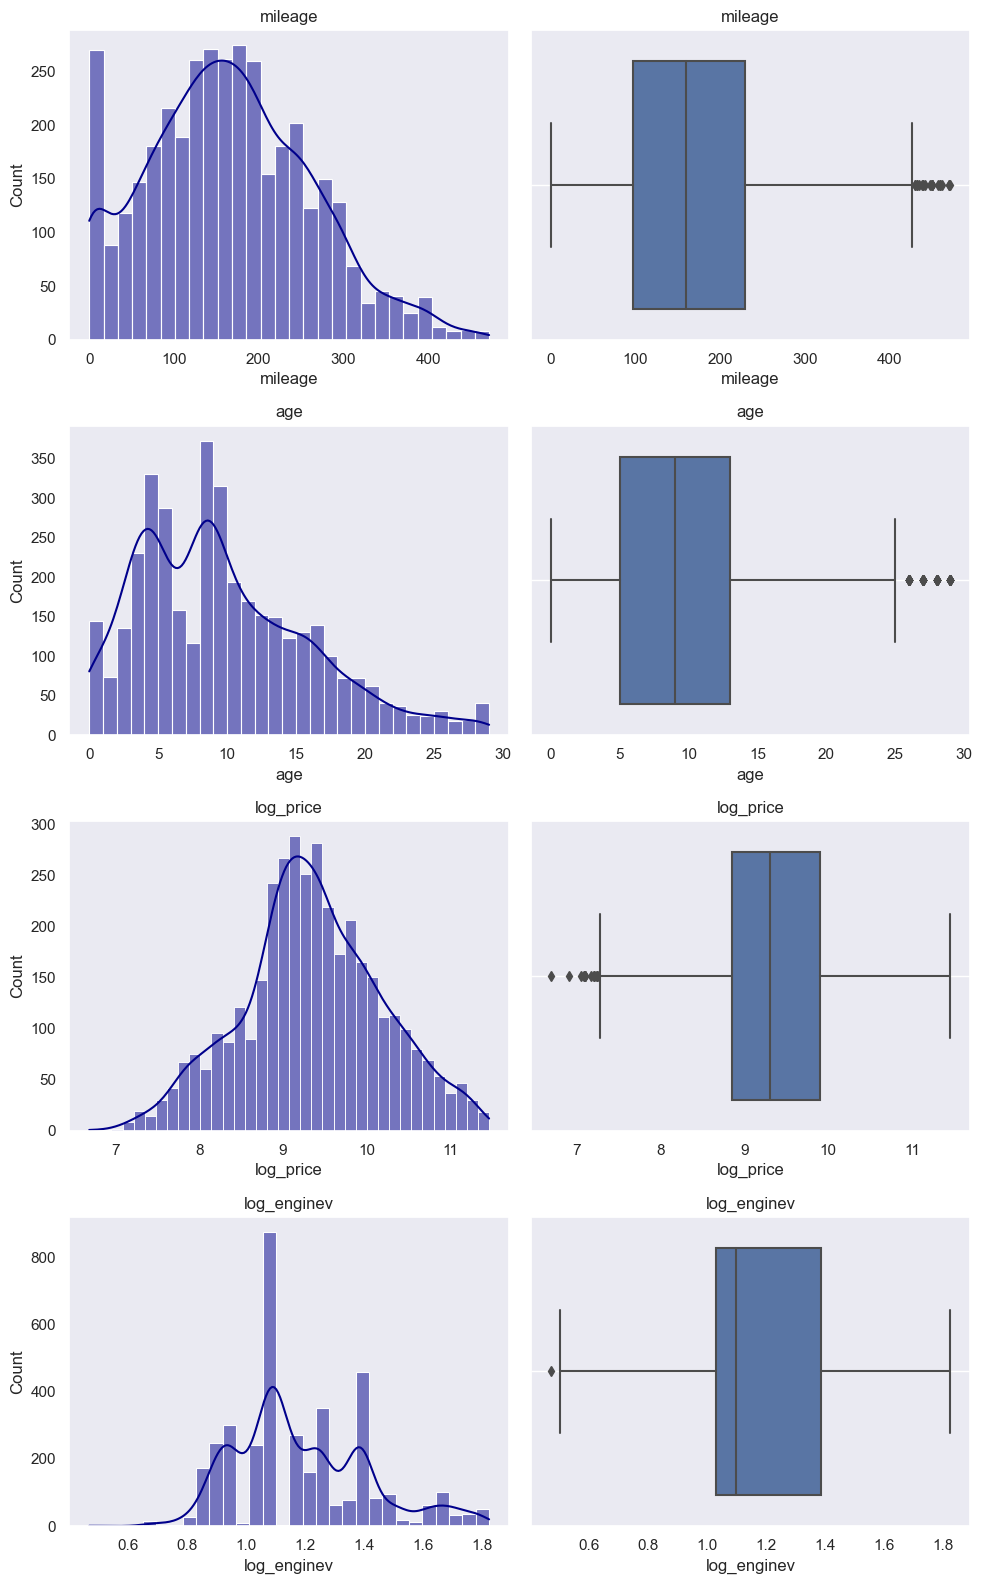

In [56]:
numeric_viz(numerical_feats)

Correlation log_price(dependent) and Independent Variable :
mileage       -0.59
age           -0.75
log_price      1.00
log_enginev    0.36
Name: log_price, dtype: float64




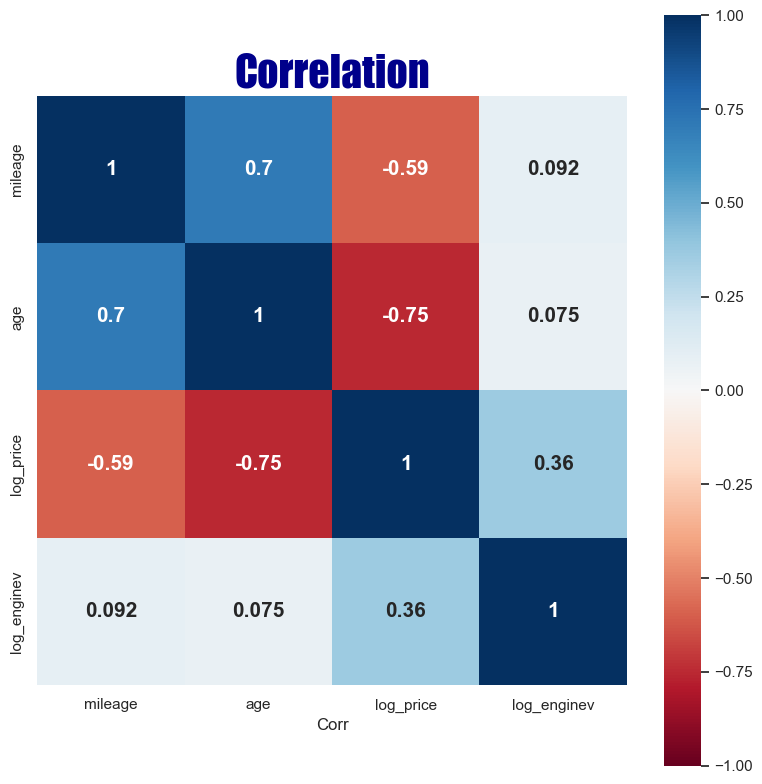

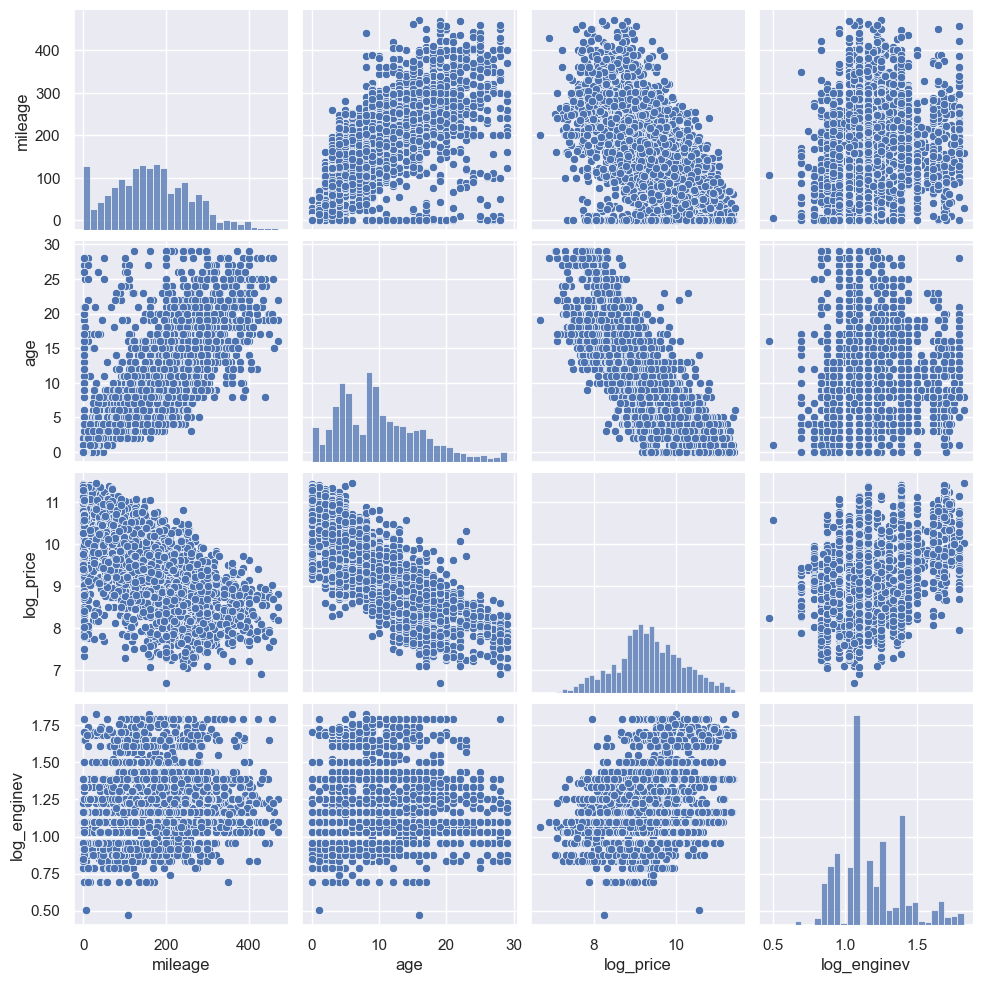

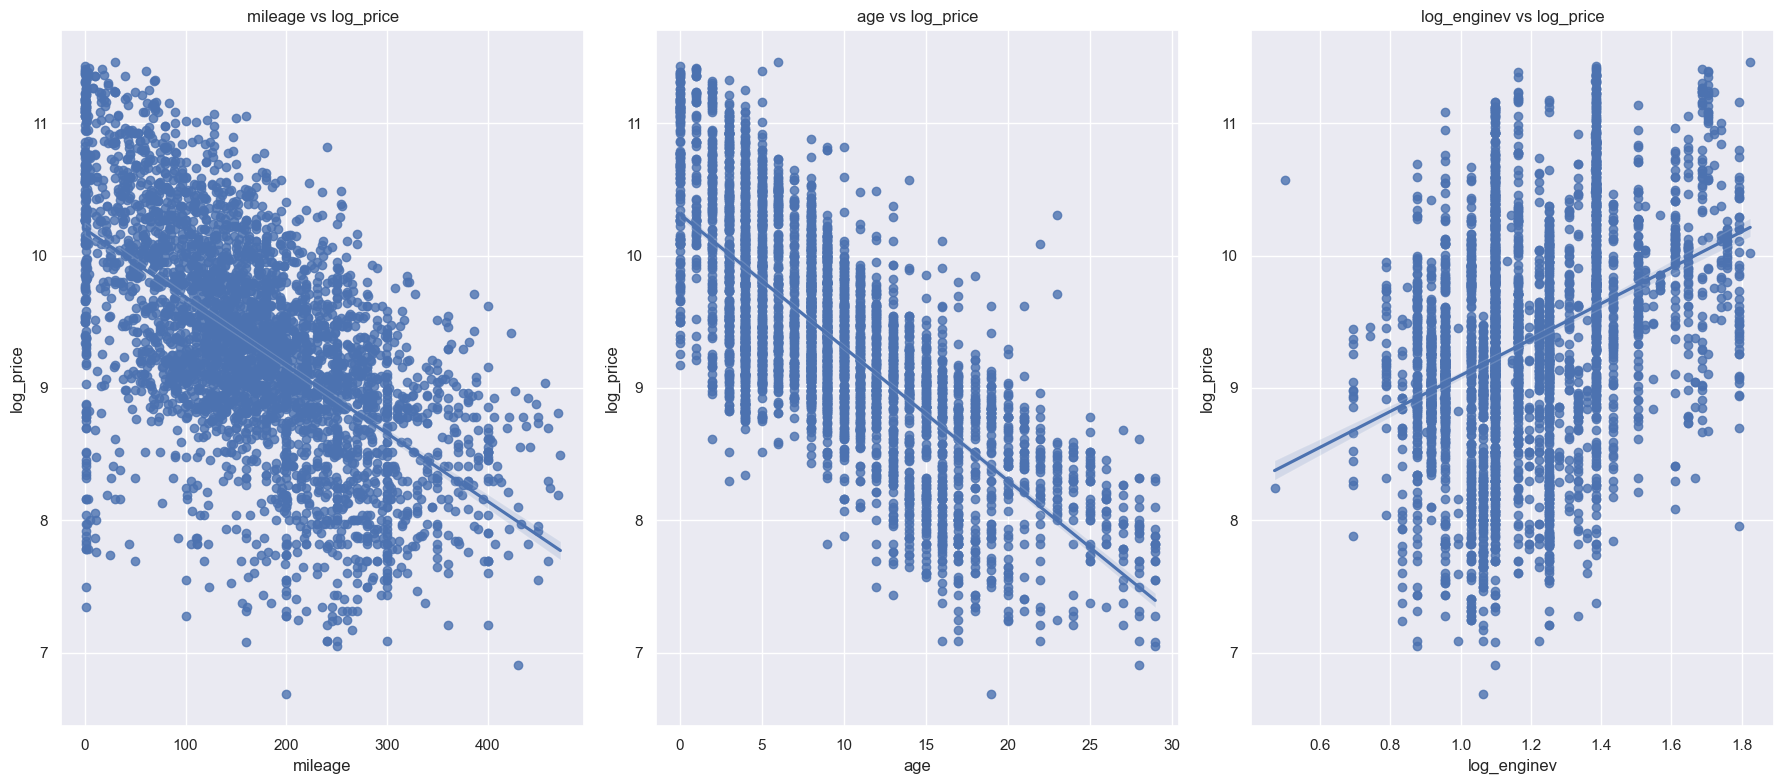

In [57]:
num_relation_viz(numerical_feats,'log_price')

In [58]:
def encoding(data,num,categorical):
    transformer = make_column_transformer(
        (StandardScaler(), num),
        (OneHotEncoder(sparse=False), categorical),
        remainder='passthrough'
        
    )
    transformed = transformer.fit_transform(data)
    column_names = transformer.get_feature_names_out().tolist()
    transformed_df = pd.DataFrame(
        transformed,
        columns=column_names
    )
    return transformed_df

In [59]:
features = encoding(data_transform, numerical_feats.columns, categorical_feats.columns)

In [60]:
features

,standardscaler__mileage,standardscaler__age,standardscaler__log_price,standardscaler__log_enginev,onehotencoder__brand_Audi,onehotencoder__brand_BMW,onehotencoder__brand_Mercedes-Benz,onehotencoder__brand_Mitsubishi,onehotencoder__brand_Renault,onehotencoder__brand_Toyota,...,onehotencoder__body_other,onehotencoder__body_sedan,onehotencoder__body_vagon,onehotencoder__body_van,onehotencoder__engine_type_Diesel,onehotencoder__engine_type_Gas,onehotencoder__engine_type_Other,onehotencoder__engine_type_Petrol,onehotencoder__registration_no,onehotencoder__registration_yes
0,1.15,2.46,-1.20,-0.39,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
1,2.70,1.18,-0.45,0.77,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
2,1.99,0.54,0.18,2.69,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,0.77,-0.10,0.83,2.05,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
4,-0.47,-0.73,0.56,-0.39,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,-0.14,-0.10,-0.62,-1.03,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
3764,-0.03,-0.26,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
3765,-1.35,-1.21,0.53,-1.03,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
3766,-1.70,1.18,-0.68,1.41,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00


In [61]:
features.columns = features.columns.str.replace('standardscaler__','')
features.columns = features.columns.str.replace('onehotencoder__','')
features.columns = features.columns.str.lower()

In [62]:
features

,mileage,age,log_price,log_enginev,brand_audi,brand_bmw,brand_mercedes-benz,brand_mitsubishi,brand_renault,brand_toyota,...,body_other,body_sedan,body_vagon,body_van,engine_type_diesel,engine_type_gas,engine_type_other,engine_type_petrol,registration_no,registration_yes
0,1.15,2.46,-1.20,-0.39,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
1,2.70,1.18,-0.45,0.77,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
2,1.99,0.54,0.18,2.69,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,0.77,-0.10,0.83,2.05,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
4,-0.47,-0.73,0.56,-0.39,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3763,-0.14,-0.10,-0.62,-1.03,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
3764,-0.03,-0.26,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
3765,-1.35,-1.21,0.53,-1.03,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
3766,-1.70,1.18,-0.68,1.41,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00


In [63]:
features.to_csv('fix_data.csv')

## **4. Modeling**

In [64]:
# define independent and dependent variables
X = features.drop(columns='log_price',axis=1)
y = features['log_price']

### Feature Selection
It is the process where you automatically or manually select features that contribute most to your target variable.

```Feature selection is primarily focused on removing non-informative or redundant predictors from the model.```— Page 488, Applied Predictive Modeling, 2013.

**Types of Feature Selection Algorithm :** 

**Filter Methods:**

Filter feature selection method apply a statistical measure to assign a scoring to each feature. Example- ANOVA, Chi-Square.

**Wrapper methods:**

Wrapper method consider the selection of a set of feature as a search problem, where different combinations are prepared, evaluated and compared to other combinations. Example- Recursive Feature Elimination, Genetic Algorithms, Boruta.

**Embedded/ Intrinsic Methods:**

Embedded method learn which feature best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods. Example- Tree Based Model, Elastic Net Regression, Lasso Regularization, Decision Trees.

#### Filter Methods

In [65]:
from sklearn.feature_selection import mutual_info_regression

In [66]:
information = mutual_info_regression(X,y)
information

array([0.31865074, 0.52514165, 0.30560329, 0.00829097, 0.04496044,
       0.0188299 , 0.00460388, 0.05813066, 0.02676418, 0.0186086 ,
       0.12803174, 0.00424614, 0.02010049, 0.01685759, 0.01048568,
       0.06543223, 0.02583977, 0.01662536, 0.        , 0.02486965,
       0.15132057, 0.13288807])

<AxesSubplot:>

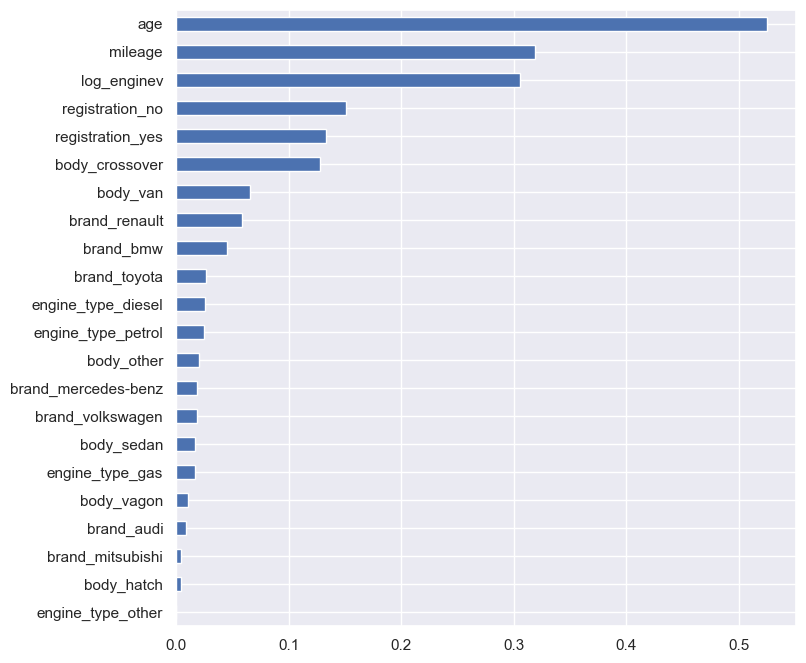

In [67]:
pd.Series(information,index=X.columns).sort_values(ascending=True).plot(kind='barh')

##### Pearson Correlation

In [68]:
cor = features.corr()

In [69]:
a = abs(cor['log_price'])
result = a
result.sort_values(ascending=False)

log_price             1.00
age                   0.75
mileage               0.59
registration_no       0.47
registration_yes      0.47
body_crossover        0.46
log_enginev           0.36
brand_renault         0.20
body_vagon            0.17
brand_toyota          0.16
body_sedan            0.14
body_hatch            0.14
brand_bmw             0.12
body_van              0.11
brand_volkswagen      0.08
engine_type_gas       0.07
brand_mitsubishi      0.06
brand_mercedes-benz   0.04
engine_type_diesel    0.04
body_other            0.03
engine_type_other     0.03
engine_type_petrol    0.03
brand_audi            0.00
Name: log_price, dtype: float64

#### Embedded Method

##### Lasso Regularization

In [70]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X,y)

LassoCV()

In [71]:
coef = pd.Series(reg.coef_, index=X.columns)

In [72]:
print(f'Lasso picked {str(sum(coef!=0))} variables and eliminated the other {str(sum(coef==0))} variables')

Lasso picked 17 variables and eliminated the other 5 variables


In [73]:
deleted_variables = coef[coef==0].index

In [74]:
deleted_variables

Index(['brand_toyota', 'body_vagon', 'engine_type_other', 'engine_type_petrol',
       'registration_yes'],
      dtype='object')

In [75]:
coef[coef!=0]

mileage               -0.11
age                   -0.62
log_enginev            0.25
brand_audi             0.24
brand_bmw              0.33
brand_mercedes-benz    0.21
brand_mitsubishi      -0.30
brand_renault         -0.44
brand_volkswagen      -0.01
body_crossover         0.34
body_hatch            -0.01
body_other             0.06
body_sedan             0.02
body_van              -0.12
engine_type_diesel     0.10
engine_type_gas       -0.02
registration_no       -1.04
dtype: float64

##### Drop unnecessary features

I tried the filter method, but the accuracy is low. I decided to drop some features based on Lasso Regularization, because prediction improves and this technique provides several benefits

* Computationally much faster than wrapper methods
* More accurate than filter methods
* Considers all the features at one time
* Not prone to overfitting

In [76]:
#define independent and dependent variable
X = features[coef[coef!=0].index]
y = features['log_price']

In [77]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

### Select Model

In [78]:
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline

In [79]:
pipelines = {
    'lightgbm':LGBMRegressor(random_state=42),
    'gbr':GradientBoostingRegressor(random_state=42),
    'rf':RandomForestRegressor(random_state=42),
    'lr':LinearRegression(),
    'ridge':Ridge(random_state=42),
    'knn':KNeighborsRegressor()
}

In [80]:
pipelines = {
    'lightgbm':make_pipeline(LGBMRegressor(random_state=42)),
    'gbr':make_pipeline(GradientBoostingRegressor(random_state=42)),
    'rf':make_pipeline(RandomForestRegressor(random_state=42)),
    'lr':make_pipeline(LinearRegression()),
    'ridge':make_pipeline(Ridge(random_state=42)),
    'knn':make_pipeline(KNeighborsRegressor())
}

#### Hyperparameter Tuning

In [86]:
hypergrid = {
    'lightgbm':{
        'lgbmregressor__boosting_type': ['gbdt', 'dart', 'goss'],
        'lgbmregressor__learning_rate': [0.1, 0.3, 0.03, 0.003, 0.01, 0.001, 0.2, 0.02, 0.002],
        'lgbmregressor__max_depth': [-1, 3, 5, 4, 6, 8, 10],
        'lgbmregressor__n_estimators': [5, 20,50, 100, 200, 500, 1000, 1500],
        'lgbmregressor__num_leaves': [7, 14, 21, 28, 31, 50],
        'lgbmregressor__reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.02, 0.03, 0.002, 0.003],
        'lgbmregressor__reg_lambda': [0.0, 0.1, 0.2, 0.3, 0.02, 0.03, 0.002, 0.003],
    },
    'gbr':{
        'gradientboostingregressor__learning_rate': [0.1, 0.3, 0.03, 0.003, 0.01, 0.001, 0.2, 0.02, 0.002],
        'gradientboostingregressor__max_depth': [-1, 3, 5, 4, 6, 8, 10],
        'gradientboostingregressor__n_estimators': [5, 20, 50, 100, 200, 500, 1000, 1500],
        'gradientboostingregressor__subsample': [0.9, 0.5, 0.2, 0.1]
            },
    'rf':{
        'randomforestregressor__bootstrap': [True, False],
        'randomforestregressor__max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
        'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
        'randomforestregressor__min_samples_leaf': [1, 3, 4, 6],
        'randomforestregressor__min_samples_split': [2, 6, 8, 10, 15],
        'randomforestregressor__n_estimators': [5, 20, 50, 100, 200, 500, 1000, 1500]
    },
    'lr':{
        'linearregression__copy_X': True,
        'linearregression__fit_intercept': True,
        'linearregression__n_jobs': None,
        'linearregression__normalize': 'deprecated',
        'linearregression__positive': False
    },
    'ridge':{
        'ridge__alpha': 1.0,
        'ridge__copy_X': True,
        'ridge__fit_intercept': True,
        'ridge__max_iter': None,
        'ridge__normalize': 'deprecated',
        'ridge__positive': False,
        'ridge__random_state': 42,
        'ridge__solver': 'auto',
        'ridge__tol': 0.001
    },
    'knn':{
        'kneighborsregressor__algorithm':["auto",  "ball_tree", "kd_tree", "brute"],
        'kneighborsregressor__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'kneighborsregressor__weights': ['uniform','distance']
        
    }
}

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [88]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1,  scoring='r2')
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for lightgbm.


In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

## **5.Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
score = {
    'Model':[],
    'R2':[],
    'MAE':[],
    'RSME':[]
}
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    score['Model'].append(algo)
    score['R2'].append(r2_score(y_test, yhat))
    score['MAE'].append(mean_absolute_error(y_test, yhat))

In [ ]:
pd.DataFrame(score)

,Model,R2,MAE
0,lightgbm,0.90,0.21
1,gbr,0.90,0.22
2,rf,0.89,0.22
3,lr,0.87,0.26
4,ridge,0.87,0.26
5,knn,0.85,0.25


In [ ]:
best_model = fit_models['lightgbm']

In [ ]:
best_model.fit(X_train,y_train)

LGBMRegressor(random_state=42)

In [ ]:
best_model.score(X_train,y_train)

0.9591767516663315

In [ ]:
best_model.score(X_test, y_test)

0.9019943486522759

<AxesSubplot:>

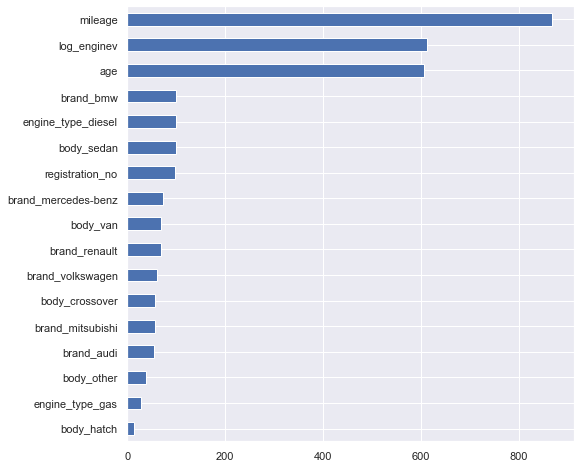

In [ ]:
pd.Series(best_model.feature_importances_, index = best_model.feature_name_).sort_values(ascending=True).plot(kind='barh')

In [ ]:
yhat = best_model.predict(X_test)
print(r2_score(y_test, yhat))
print(mean_absolute_error(y_test, yhat))

0.9019943486522759
0.21039777362811465


### Feature Importance
When choosing which features are important and which are not, feature importance might be a useful indicator. However, it can be misleading in challenging situations, such as when several features are highly associated with others.

In [ ]:
result_importance = pd.Series(importance, index=X.columns)

<AxesSubplot:>

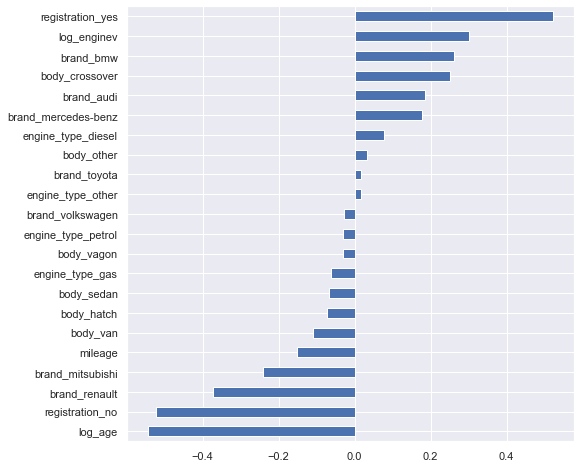

In [ ]:
result_importance.sort_values(ascending=True).plot(kind='barh')